# Mentoria 

### Hito 1 - Práctico de análisis y visualización

In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from statusFixer import statusFixer

#!pip install python-decouple
#from decouple import config
from sqlalchemy import create_engine, text

sns.set_context('talk')

Se leen los archivos `.csv`

In [2]:
df_2019 = pd.read_csv("dataset\DataSet2019.csv", sep=';')
df_2020 = pd.read_csv("dataset\DataSet2020.csv",sep=';')
df_2021 = pd.read_csv("dataset\DataSet2021.csv",sep=';')
df_2022 = pd.read_csv("dataset\DataSet2022.csv",sep=';')
df_Montos = pd.read_csv("dataset\DataSetMontos.csv",sep=';')

Definimos las columnas de los dataset

**DataSet20XX.csv**  

`seg_id`		= Id Interno del seguimiento  
`prs_id`		= Id Interno de la persona  
`seg_codigo`	= Id Interno de la acción realizada  
`hora`		    = Fecha y Hora de la acción  
`seg_usuario`   = Usuario que realizo la acción  
`obn_acreedor`	= Id Interno del acreedor  
`obn_interno`	= Id Interno de la obligación  
`obn_producto`	= Id Interno de tipo de producto  
`obn_cabecera`	= Id Interno de Asignación --> Cartera de clientes   
`fecha_alta`	= Fecha de Ingreso de la obligación  
`obn_estudio`	= Id Interno del estudio asignado  
`estado` 	    = Estado de la obligación  


**DataSetMontos.csv**  

`obn_id`		= Id Interno de la obligación  
`monto_deuda`	= Importe de deuda original  

Observamos los dataframes.

#### DataFrame 2019

In [3]:
df_2019.columns

Index(['seg_id', 'prs_id', 'seg_codigo', 'hora', 'seg_usuario', 'obn_acreedor',
       'obn_interno', 'obn_producto', 'obn_cabecera', 'fecha_alta',
       'obn_estudio', 'estado                                      19605115',
       '794514', '9', '08/10/2019 10:59:00', '330', '264', '1445961', '1',
       '9275', '24/09/2019', '940', 'B                       '],
      dtype='object')

Vemos que hay mas columnas de las mencionadas anteriormente. Se revisan las columnas en cuestion.

In [4]:
df_2019.dtypes
df_2019[:5]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,...,9,08/10/2019 10:59:00,330,264,1445961,1,9275,24/09/2019,940,B
0,19605119,787994,323,08/10/2019 11:00:00,341,269,1438679,102,9269,23/09/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19605121,771970,326,08/10/2019 11:00:00,313,264,1411199,1,9243,23/08/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19605122,771866,33,08/10/2019 11:00:00,349,264,1411092,1,9243,23/08/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19605123,772097,323,08/10/2019 11:00:00,362,264,1411333,1,9243,23/08/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19605130,793962,323,08/10/2019 11:00:00,407,266,1445070,2,9272,24/09/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_2019.describe().round(2)

,seg_id,prs_id,seg_codigo,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,obn_estudio,794514,9,08/10/2019 10:59:00,330,264,1445961,1,9275,24/09/2019,940,B
count,1066261.00,1066261.00,1066261.00,1066261.00,1066261.00,1066261.0,1066261.00,1066261.00,1066261.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,18439712.81,753286.30,252.94,317.43,265.05,1399858.4,9.49,9163.24,973.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1858286.50,61517.55,123.59,81.17,1.81,36395.3,26.31,102.98,66.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15120414.00,74678.00,1.00,88.00,264.00,1354293.0,1.00,9002.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,16803356.00,747887.00,223.00,228.00,264.00,1374773.0,1.00,9079.00,940.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,18301453.00,753868.00,323.00,335.00,264.00,1392037.0,1.00,9174.00,940.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19975867.00,772180.00,326.00,377.00,266.00,1412884.0,2.00,9247.00,1041.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,32870430.00,835300.00,387.00,461.00,272.00,1511833.0,102.00,9395.00,1339.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_2019.tail(5)

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,...,9,08/10/2019 10:59:00,330,264,1445961,1,9275,24/09/2019,940,B
1066256,32870425,701629,323,26/12/2019 09:01:43,294,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066257,32870426,701629,323,26/12/2019 09:01:43,294,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066258,32870427,701629,323,26/12/2019 09:01:44,294,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066259,32870429,701629,361,29/12/2019 09:01:44,206,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066260,32870430,701629,379,29/12/2019 09:01:44,206,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se observan que tienen valores nulos. Se definen entonces las columnas del dataset y se renombra la columna estado.

In [7]:
columns = ['seg_id', 'prs_id', 'seg_codigo', 'hora', 'seg_usuario', 'obn_acreedor',
       'obn_interno', 'obn_producto', 'obn_cabecera', 'fecha_alta',
       'obn_estudio', 'estado' ]

df_2019.rename(columns= {'estado                                      19605115':'estado'}, inplace=True)
df_2019 = df_2019[columns]
df_2019.tail(5)

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado
1066256,32870425,701629,323,26/12/2019 09:01:43,294,270,1459936,6,9323,28/10/2019,1112,C
1066257,32870426,701629,323,26/12/2019 09:01:43,294,270,1459936,6,9323,28/10/2019,1112,C
1066258,32870427,701629,323,26/12/2019 09:01:44,294,270,1459936,6,9323,28/10/2019,1112,C
1066259,32870429,701629,361,29/12/2019 09:01:44,206,270,1459936,6,9323,28/10/2019,1112,C
1066260,32870430,701629,379,29/12/2019 09:01:44,206,270,1459936,6,9323,28/10/2019,1112,C


#### DataFrame 2020

In [8]:
df_2020.columns

Index(['seg_id', 'prs_id', 'seg_codigo', 'hora', 'seg_usuario', 'obn_acreedor',
       'obn_interno', 'obn_producto', 'obn_cabecera', 'fecha_alta',
       'obn_estudio', 'estado                                      21945454',
       '839807', '326', '17/01/2020 15:45:51', '446', '269', '1522781', '1',
       '9437', '16/01/2020', '1192', 'B                    '],
      dtype='object')

In [9]:
df_2020.dtypes

seg_id                                                    int64
prs_id                                                    int64
seg_codigo                                                int64
hora                                                     object
seg_usuario                                               int64
obn_acreedor                                              int64
obn_interno                                               int64
obn_producto                                              int64
obn_cabecera                                              int64
fecha_alta                                               object
obn_estudio                                               int64
estado                                      21945454     object
839807                                                  float64
326                                                     float64
17/01/2020 15:45:51                                     float64
446                                     

In [10]:
df_2020.describe().round(2)

,seg_id,prs_id,seg_codigo,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,obn_estudio,839807,326,17/01/2020 15:45:51,446,269,1522781,1,9437,16/01/2020,1192,B
count,1669590.00,1669590.00,1669590.00,1669590.00,1669590.00,1669590.00,1669590.00,1669590.00,1669590.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,24977580.55,825488.84,231.37,322.85,263.72,1527683.94,9.06,9465.17,1022.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1856643.00,92169.74,136.92,96.52,23.49,67763.39,25.09,160.48,99.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,21594291.00,74125.00,2.00,147.00,36.00,1058479.00,1.00,7433.00,231.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,23437216.25,794568.00,53.00,219.00,264.00,1488102.00,1.00,9364.00,940.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,25055828.00,844559.00,323.00,340.00,264.00,1540734.00,1.00,9487.00,1040.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,26464039.75,876764.00,332.00,410.00,269.00,1579087.00,4.00,9586.00,1092.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,32870853.00,921015.00,390.00,494.00,272.00,1638182.00,103.00,9785.00,1339.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_2020.tail(5)

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,...,326,17/01/2020 15:45:51,446,269,1522781,1,9437,16/01/2020,1192,B
1669585,32870811,701629,323,30/11/2020 09:03:27,374,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669586,32870812,701629,323,30/11/2020 09:03:27,374,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669587,32870813,701629,323,30/11/2020 09:03:27,374,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669588,32870815,701629,361,01/12/2020 09:03:28,206,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669589,32870816,701629,379,01/12/2020 09:03:28,206,270,1459936,6,9323,28/10/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se observa el mismo problema que en el `df_2019`. Renombramos de igual manera y dejamos solo las columnas pertinentes

In [12]:
df_2020.rename(columns= {'estado                                      21945454':'estado'}, inplace=True)
df_2020 = df_2020[columns]
df_2020[:5]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado
0,21945483,821495,326,17/01/2020 15:48:52,432,264,1488333,1,9364,23/11/2019,940,B
1,21945484,835147,326,17/01/2020 15:48:58,322,264,1511676,1,9395,26/12/2019,940,B
2,21945486,821495,326,17/01/2020 15:49:03,432,264,1488333,1,9364,23/11/2019,940,B
3,21945496,801521,326,17/01/2020 15:49:46,439,264,1456453,1,9321,25/10/2019,1040,C
4,21945512,801615,326,17/01/2020 15:51:12,426,264,1456550,1,9321,25/10/2019,1041,B


#### DataFrame 2021

In [13]:
df_2021.columns

Index(['seg_id', 'prs_id', 'seg_codigo', 'hora', 'seg_usuario', 'obn_acreedor',
       'obn_interno', 'obn_producto', 'obn_cabecera', 'fecha_alta',
       'obn_estudio', 'estado                                      37470164',
       '971009', '326', '06/10/2021 16:43:14', '531', '269', '1708410', '1',
       '10069', '06/09/2021', '1192', 'B                   '],
      dtype='object')

In [14]:
df_2021.dtypes

seg_id                                                    int64
prs_id                                                    int64
seg_codigo                                                int64
hora                                                     object
seg_usuario                                               int64
obn_acreedor                                              int64
obn_interno                                               int64
obn_producto                                              int64
obn_cabecera                                              int64
fecha_alta                                               object
obn_estudio                                               int64
estado                                      37470164     object
971009                                                  float64
326                                                     float64
06/10/2021 16:43:14                                     float64
531                                     

In [15]:
df_2021.describe().round(2)

,seg_id,prs_id,seg_codigo,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,obn_estudio,971009,326,06/10/2021 16:43:14,531,269,1708410,1,10069,06/09/2021,1192,B
count,2660287.00,2660287.00,2660287.00,2660287.00,2660287.00,2660287.00,2660287.00,2660287.00,2660287.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,34010977.66,853944.52,292.93,320.32,267.79,1602998.07,21.93,9719.82,1092.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3530458.55,141619.31,128.64,99.61,2.66,97786.52,39.12,296.87,120.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,28326644.00,74143.00,0.00,147.00,36.00,1045862.00,1.00,6967.00,312.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,30779961.50,805387.00,323.00,248.00,264.00,1479767.00,1.00,9326.00,1037.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,34102258.00,914541.00,361.00,248.00,269.00,1640631.00,2.00,9797.00,1093.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37046509.50,947927.00,379.00,408.00,270.00,1681809.50,6.00,9967.00,1112.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,40896777.00,998465.00,399.00,540.00,277.00,1755580.00,103.00,10212.00,1397.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_2021.tail(5)

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,...,326,06/10/2021 16:43:14,531,269,1708410,1,10069,06/09/2021,1192,B
2660282,40531607,960516,398,06/01/2022 11:40:23,325,264,1694005,1,10019,23/07/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660283,40531608,967182,398,06/01/2022 11:40:23,325,264,1703162,1,10052,24/08/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660284,40531534,945607,398,06/01/2022 11:39:56,325,264,1672915,1,9952,21/05/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660285,40531535,956089,398,06/01/2022 11:39:56,325,264,1686276,1,9982,24/06/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660286,40531609,966607,398,06/01/2022 11:40:23,325,264,1702568,1,10052,24/08/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nuevamente el mismo problema que para los dataframe `df_2019` y `df_2020`.

In [17]:
df_2021.rename(columns= {'estado                                      37470164':'estado'}, inplace=True)
df_2021 = df_2021[columns]
df_2021[:5]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado
0,37294976,967387,326,04/10/2021 15:22:28,493,264,1703372,1,10052,24/08/2021,940,B
1,37295062,945690,323,04/10/2021 15:28:39,455,264,1673000,1,9952,21/05/2021,1040,B
2,37295071,831888,326,04/10/2021 15:29:22,369,271,1504791,2,9386,11/12/2019,1092,A
3,37295102,975954,323,04/10/2021 15:31:14,175,264,1715481,1,10084,24/09/2021,940,B
4,37295114,967387,326,04/10/2021 15:31:59,493,264,1703372,1,10052,24/08/2021,940,B


#### DataFrame 2022

In [18]:
df_2022.columns

Index(['seg_id', 'prs_id', 'seg_codigo', 'hora', 'seg_usuario', 'obn_acreedor',
       'obn_interno', 'obn_producto', 'obn_cabecera', 'fecha_alta',
       'obn_estudio', 'estado '],
      dtype='object')

In [19]:
df_2022.dtypes

seg_id           int64
prs_id           int64
seg_codigo       int64
hora            object
seg_usuario      int64
obn_acreedor     int64
obn_interno      int64
obn_producto     int64
obn_cabecera     int64
fecha_alta      object
obn_estudio      int64
estado          object
dtype: object

In [20]:
df_2022.describe().round(2)

,seg_id,prs_id,seg_codigo,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,obn_estudio
count,532746.00,532746.00,532746.00,532746.00,532746.00,532746.00,532746.00,532746.00,532746.00
mean,41881971.77,909675.00,299.12,330.12,268.00,1681141.62,23.97,9968.64,1070.51
std,782437.10,147266.42,113.43,107.85,3.81,134028.82,41.10,396.58,144.93
min,40398847.00,75843.00,2.00,147.00,36.00,1151375.00,1.00,8268.00,312.00
25%,41154449.25,809644.00,320.00,248.00,264.00,1508087.75,1.00,9386.00,940.00
50%,41923431.50,984768.00,326.00,248.00,269.00,1739352.00,2.00,10176.00,1092.00
75%,42544126.75,1004547.00,379.00,414.00,270.00,1766284.00,6.00,10251.00,1112.00
max,43584013.00,1032616.00,399.00,577.00,277.00,1833294.00,106.00,10361.00,1397.00


In [21]:
df_2022.rename(columns= {'estado ':'estado'}, inplace=True)
df_2022.tail(5)

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado
532741,43222824,1031221,323,31/03/2022 12:42:21,403,264,1831107,1,10348,23/03/2022,901,L
532742,43222837,1009669,323,31/03/2022 12:43:18,556,269,1784296,1,10279,09/02/2022,1192,A
532743,43222838,1031221,320,31/03/2022 12:43:23,403,264,1831107,1,10348,23/03/2022,901,L
532744,43222897,1004646,8,31/03/2022 12:46:40,541,264,1766080,1,10251,21/01/2022,911,A
532745,43222951,1006763,323,31/03/2022 12:49:12,427,266,1770062,4,10267,03/02/2022,896,A


#### DataFrame Montos

In [22]:
df_Montos.columns

Index(['obn_id', 'monto_deuda'], dtype='object')

In [23]:
df_Montos.dtypes

obn_id          int64
monto_deuda    object
dtype: object

In [24]:
df_Montos['monto_deuda'] = df_Montos.monto_deuda.str.replace(',','.').astype('float') 
df_Montos.dtypes

obn_id           int64
monto_deuda    float64
dtype: object

In [25]:
df_Montos.monto_deuda.describe().round(2)

count      234363.00
mean        44406.24
std         72484.74
min       -256148.00
25%          8281.17
50%         22665.95
75%         54265.78
max      13218122.00
Name: monto_deuda, dtype: float64

In [26]:
df_Montos[:]

,obn_id,monto_deuda
0,1389386,45022.85
1,1389387,58317.55
2,1389388,24582.60
3,1389389,146845.27
4,1389390,59499.16
...,...,...
234358,1837228,24260.42
234359,1837229,6410.08
234360,1837230,6458.13
234361,1837231,10307.85


#### Dataframe Periodo 2019-2022
Concatenamos los dataframe por año en uno solo para poder analizar los distintos tipos de datos a un nivel mas general

In [27]:
df_years = [df_2019,
            df_2020,
            df_2021,
            df_2022]

#Uno los dataframes por año
df_2019_2022 = pd.DataFrame()
for df in df_years:
    df_2019_2022 = pd.concat([df_2019_2022,df])

In [28]:
df_2019_2022.describe().round(2)

df_2019_2022.head(10)

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado
0,19605119,787994,323,08/10/2019 11:00:00,341,269,1438679,102,9269,23/09/2019,1111,B
1,19605121,771970,326,08/10/2019 11:00:00,313,264,1411199,1,9243,23/08/2019,1041,B
2,19605122,771866,33,08/10/2019 11:00:00,349,264,1411092,1,9243,23/08/2019,940,B
3,19605123,772097,323,08/10/2019 11:00:00,362,264,1411333,1,9243,23/08/2019,940,B
4,19605130,793962,323,08/10/2019 11:00:00,407,266,1445070,2,9272,24/09/2019,896,B
5,19605133,771970,326,08/10/2019 11:01:00,313,264,1411199,1,9243,23/08/2019,1041,B
6,19605134,759727,323,08/10/2019 11:01:00,399,264,1392482,1,9174,24/06/2019,940,B
7,19605137,766244,323,08/10/2019 11:01:00,422,264,1402275,1,9208,24/07/2019,940,B
8,19605138,792637,323,08/10/2019 11:01:00,434,269,1443522,102,9269,23/09/2019,1093,B
9,19605140,771970,326,08/10/2019 11:01:00,313,264,1411199,1,9243,23/08/2019,1041,B


In [29]:
#Creo tabla SQL con los datos de todos los años
#engine = create_engine('sqlite:///datosPeriodo.sqlite3')
#df_2019_2022.to_sql('datosPeriodo', con=engine, if_exists="replace")

In [30]:
df = pd.merge(df_2019_2022, df_Montos,left_on='obn_interno', right_on='obn_id', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5914144 entries, 0 to 5914143
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   seg_id        int64  
 1   prs_id        int64  
 2   seg_codigo    int64  
 3   hora          object 
 4   seg_usuario   int64  
 5   obn_acreedor  int64  
 6   obn_interno   int64  
 7   obn_producto  int64  
 8   obn_cabecera  int64  
 9   fecha_alta    object 
 10  obn_estudio   int64  
 11  estado        object 
 12  obn_id        int64  
 13  monto_deuda   float64
dtypes: float64(1), int64(10), object(3)
memory usage: 676.8+ MB


In [31]:
df.columns

Index(['seg_id', 'prs_id', 'seg_codigo', 'hora', 'seg_usuario', 'obn_acreedor',
       'obn_interno', 'obn_producto', 'obn_cabecera', 'fecha_alta',
       'obn_estudio', 'estado', 'obn_id', 'monto_deuda'],
      dtype='object')

In [32]:
df_obn = df.drop_duplicates(subset=['obn_interno'], keep='last')

df_obn

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda
90,24115809,787994,50,28/04/2020 12:11:46,228,269,1438679,102,9269,23/09/2019,1111,B,1438679,44121.12
293,25312783,771970,361,02/07/2020 09:46:25,368,264,1411199,1,9243,23/08/2019,1041,B,1411199,18000.00
375,24753129,771866,50,02/06/2020 13:47:14,368,264,1411092,1,9243,23/08/2019,940,B,1411092,13714.54
526,24752441,772097,50,02/06/2020 13:46:13,368,264,1411333,1,9243,23/08/2019,940,B,1411333,30039.80
549,19362301,793962,48,30/09/2019 11:02:00,407,266,1445070,2,9272,24/09/2019,896,B,1445070,29463.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5914123,43212530,1032613,247,30/03/2022 14:08:14,312,276,1833291,106,10360,29/03/2022,1394,A,1833291,14089.66
5914127,43219999,1029954,33,31/03/2022 10:23:20,294,266,1829530,33,10343,22/03/2022,971,A,1829530,217336.31
5914134,43219527,1029963,323,31/03/2022 09:56:36,294,266,1829542,2,10343,22/03/2022,971,A,1829542,220282.61
5914138,43221216,893587,8,31/03/2022 11:28:36,294,266,1829529,33,10343,22/03/2022,971,A,1829529,213997.32


Se observa por los descriptivos de los dataframes que la mayoria de variables son numericas. Esto no es cierto ya que en realidad son identificadores, aunque sean numeros operan como variables categoricas.

Con esto en mente procedemos a hacer el analisis requerido.

# 1 Top 10: Maximas y minimas cantidades de tipo de gestion.

Se contabilizan los 10 tipos de gestion que mas se repiten a lo largo del dataset

,seg_codigo,count
0,379,1411916
1,323,805947
2,326,791314
3,361,758342
4,9,292668
5,225,281259
6,50,162147
7,7,108774
8,155,104861
9,8,83107


<Figure size 3600x3600 with 0 Axes>

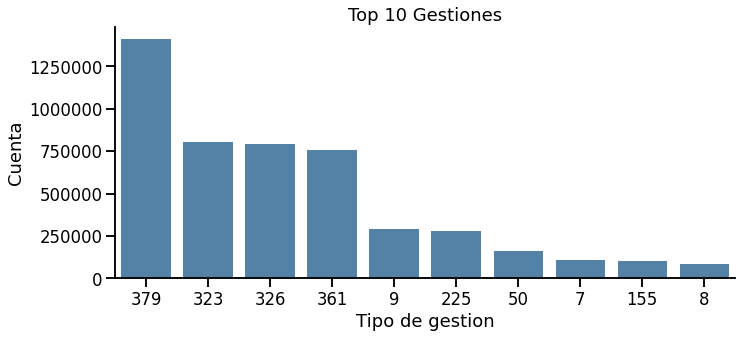

In [33]:
#Filtramos la 10 gestiones
top_10_gestiones = df.seg_codigo\
    .value_counts()\
    .sort_values(ascending = False)\
    .head(10)\
    .reset_index()\
    .rename(columns= {'index':'seg_codigo','seg_codigo':'count'})

#Grafico Top 10 maximas cantidades de tipo de gestion
plt.figure(figsize=(50,50))
sns.catplot(x='seg_codigo', y='count', hue=None, data=top_10_gestiones,\
           kind='bar', height = 5, aspect = 2, order=top_10_gestiones['seg_codigo'], color='steelblue')
plt.title('Top 10 Gestiones')
plt.xlabel('Tipo de gestion')
plt.ylabel('Cuenta')
plt.ticklabel_format(axis="y", style="plain")


top_10_gestiones

Se contabilizan las 10 tipos de gestiones que menos se realizan. Se considera un piso de 1000 para la cantidad de gestiones para que estas mantengan cierta representatividad.

,seg_codigo,count
0,368,1038
1,127,1073
2,346,1148
3,397,1260
4,317,1336
5,385,1364
6,364,1419
7,335,1598
8,396,1601
9,199,1809


<Figure size 3600x3600 with 0 Axes>

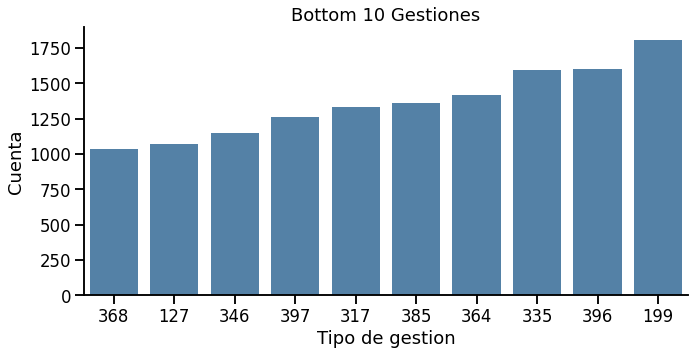

In [34]:
df['seg_count_codigo'] = df['seg_codigo'].map(df['seg_codigo'].value_counts())

#Filtramos gestiones que se hayan hecho menos de mil veces
df_filtered_gestion = df[df['seg_count_codigo']>1000]
#Consideramos las ultimas 10 gestiones que se hayan realizado como minimo 1000 veces
bottom_10_gestiones = df_filtered_gestion.seg_codigo\
    .value_counts()\
    .sort_values(ascending = True)\
    .head(10)\
    .reset_index()\
    .rename(columns= {'index':'seg_codigo','seg_codigo':'count'})

#Grafico bottom 10 minimas gestiones realizadas
plt.figure(figsize=(50,50))
sns.catplot(x='seg_codigo', y='count', hue=None, data=bottom_10_gestiones,\
           kind='bar', height = 5, aspect = 2, order=bottom_10_gestiones['seg_codigo'], color='steelblue')
plt.title('Bottom 10 Gestiones')
plt.xlabel('Tipo de gestion')
plt.ylabel('Cuenta')
plt.ticklabel_format(axis="y", style="plain")

bottom_10_gestiones

#Hacer grafico

# 2 Cantidad de personas, usuarios, estados y acreedores.

#### Cantidad de personas

La cantidad de personas que aparecen en el dataset es de:

In [35]:
personas_totales = list(set(df_2019_2022.prs_id.to_list())) # Se puede hacer lo mismo con la funcion unique() --> df.unique()
print("Personas Totales = ",len(personas_totales))

personas = df.prs_id.unique()
print("Personas luego del join de los dataset = ", len(personas))

personas_obn = df_obn.prs_id.unique() 
print("Personas por obligacion = ", len(personas_obn))



Personas Totales =  184410
Personas luego del join de los dataset =  180848
Personas por obligacion =  180848


Hay en el dataset total 184410 personas luego de hacer el join con la tabla de montos se dropean aproximadamente 14 mil filas en donde estan contenidas las 3562 personas de diferencia con el df concatenado el cual tiene un total de personas de 180848. Se observa comparando con el df_obn que considera la ultima gestion sobre obligacion que la cantidad de personas que quedan en el df concatenado coincide.

#### Cantidad de usuarios que realizaron una accion

In [36]:
ususarios_totales = list(set(df_2019_2022.seg_usuario.to_list()))
print('Usuarios Totales = ',len(ususarios_totales))

ususarios = list(set(df.seg_usuario.to_list()))
print('Usuarios luego del join de los dataset = ',len(ususarios))

ususarios_obn = df_obn.seg_usuario.unique()
print('Usuarios por obligacion = ',len(ususarios_obn))

Usuarios Totales =  238
Usuarios luego del join de los dataset =  238
Usuarios por obligacion =  188


Hay 238 usuarios que participaron considerando todas las gestiones realizadas. Si tomamos solo la ultima gestion por obligacion la cantidad de usuarios que quedaron es de 188.

#### Cantidad de tipo de acciones que se realizaron

Para considerar la cantidad de acciones realizadas vamos a considerar el dataset que contempla todas las gestiones realizadas, sin dropear nada, a los fines de contemplar todas las acciones que se llevaron a cabo.

In [37]:
acciones = list(set(df_2019_2022.seg_codigo.to_list()))
len(acciones)

277

#### Cantidad de estudios

In [38]:
estudios_totales = list(set(df_2019_2022.obn_estudio.to_list()))

estudios = df.obn_estudio.unique()

estudios_obn = list(set(df_obn.obn_estudio.to_list()))

print( f"Cantidad de estudios Totales registrados = {len(estudios_totales)}\n\
Cantidad de estudios despues del join = {len(estudios)} \n\
Cantidad de estudios que mantienen participacion = {len(estudios_obn)}")


Cantidad de estudios Totales registrados = 144
Cantidad de estudios despues del join = 89 
Cantidad de estudios que mantienen participacion = 89


La cantidad de estudios totales es de 144. Despues del join el dropeo de filas genera que el numero total de estudios sea de 89, lo que coincide con la cantidad de estudios que mantienen participacion en la ultima gestion de las obligaciones.

#### Estados de obligacion posibles

In [39]:
#Al ser de tipo 'string' los datos, no se pueden limpiar solo con el set
estados = list(set(df_2019_2022.estado.to_list()))

#Creamos un nuevo arreglo para añadir los valores de forma correcta
estados_posibles = []
for estado in estados:
    estados_posibles.append(estado.rstrip())

#Filtramos ahora si con el set
estados_posibles = list(set(estados_posibles))
print(f"La cantidad de estados posibles son {len(estados_posibles)} y se identifican como {estados_posibles}")

La cantidad de estados posibles son 6 y se identifican como ['B', 'O', 'C', 'R', 'L', 'A']


La cantidad de obligaciones que tiene cada estado se puede visualizar de la siguiente manera.

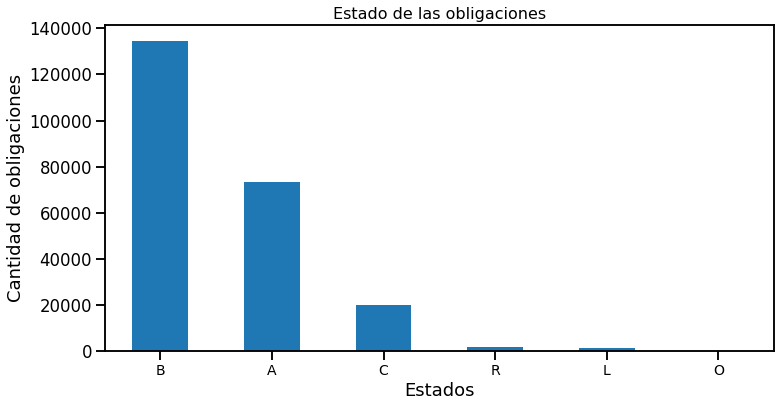

In [40]:
plt.figure(num = 1, figsize = (12,6))
df_obn['estado'].apply(statusFixer).value_counts().plot(kind="bar")
plt.xticks(rotation = 0, fontsize = 14)
plt.xlabel("Estados")
plt.ylabel("Cantidad de obligaciones")
plt.title("Estado de las obligaciones",fontsize = 16)
plt.ticklabel_format(axis="y", style="plain")

Vemos que la mayoria de obligaciones estan dadas de baja (B), le siguen obligaciones activas (A) que estan empezando a gestionarse y en terer lugar estan las obligaciones canceladas (C). Luego estan las deudas refinanciadas (R), las deudas arregladas (L) y finalmente las pendientes de cancelacion (O)

Habira que contemplar el dropeo de las deudas de baja debido a que son deudas que ya no formarian parte de la actividad de gestion y a su vez habria que considerar el dropeo de las deudas refinanciadas, arregladas y pendientes de cancelacion debido a su poca representatividad.

#### Relacion entre estudios y estados de obligaciones

Vemos la relacion entre los estudios y los estados de obligaciones. Consideramos los estudios con mas de 5000 obligaciones a los fines de analizar en que estado estan sus obligaciones.

C:\Users\teoas\AppData\Local\Temp\ipykernel_17416\4169905639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obn['obn_count_estudio'] = df_obn['obn_estudio'].map(df_obn['obn_estudio'].value_counts())


estado           A      B     C    L  O    R
obn_estudio                                 
896            950   6181   542   33  4    0
940             17  15048   288   24  3    0
971            389   5583   202   10  3    0
1051          3475     30  1609  205  0  100
1052          3813     20  1203  202  0   97
1092          6875     23   664   51  3    0
1093         10755  57156   428   17  0    0
1112         24113     34   221   99  0    0
1192          4375  20704   656   30  1    0
1264           911   7557     0    0  0    0
1337             0   6841     6    0  0    0
1372          4976    381     3   33  2    0


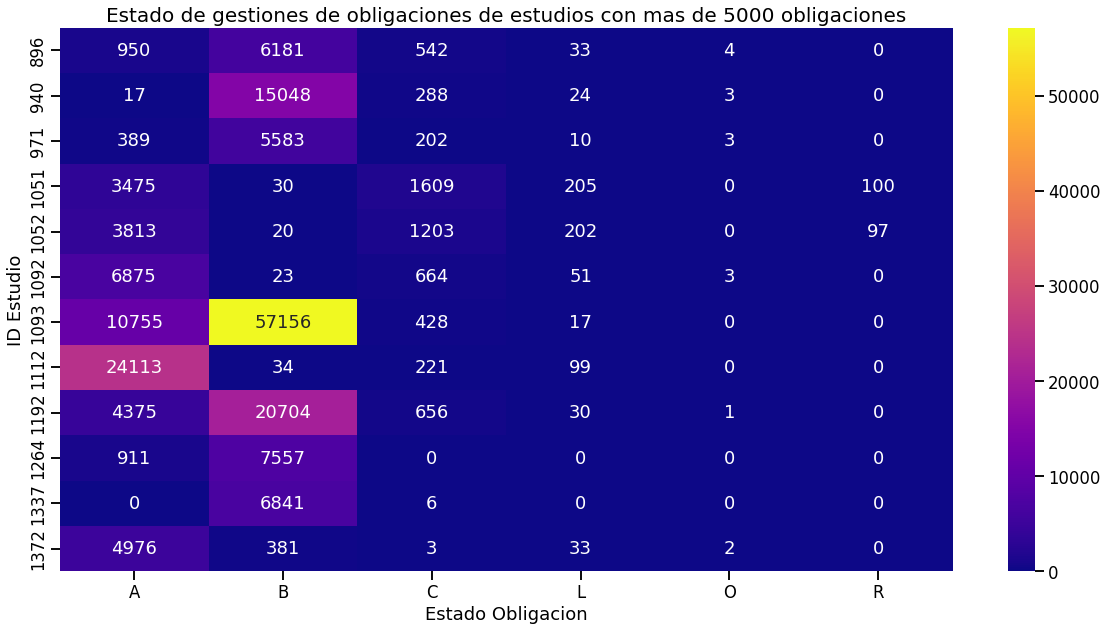

In [41]:
df_obn['obn_count_estudio'] = df_obn['obn_estudio'].map(df_obn['obn_estudio'].value_counts())

df_obn_filtered = df_obn[(df_obn['obn_count_estudio']>5000) ]

estado_obn_estudio = pd.crosstab(df_obn_filtered['obn_estudio'],
                                 df_obn_filtered['estado'].apply(statusFixer))
print(estado_obn_estudio)

plt.figure(num = 1, figsize = (20,10))
sns.heatmap(estado_obn_estudio, annot=True, fmt='d', cmap = 'plasma')
plt.xlabel('Estado Obligacion')
plt.ylabel('ID Estudio')
plt.title('Estado de gestiones de obligaciones de estudios con mas de 5000 obligaciones', fontsize=20)

pd.options.mode.chained_assignment = None

Muchos de estos estudios tienen sus obligaciones dadas de baja, a los fines de ver los estudios mas representativos con obligaciones activas hacemos el mismo heatmap pero dropeando las obligaciones dadas de baja.

estado           A     C    L  O    R
obn_estudio                          
1051          3475  1609  205  0  100
1052          3813  1203  202  0   97
1092          6875   664   51  3    0
1093         10755   428   17  0    0
1112         24113   221   99  0    0
1192          4375   656   30  1    0
1372          4976     3   33  2    0


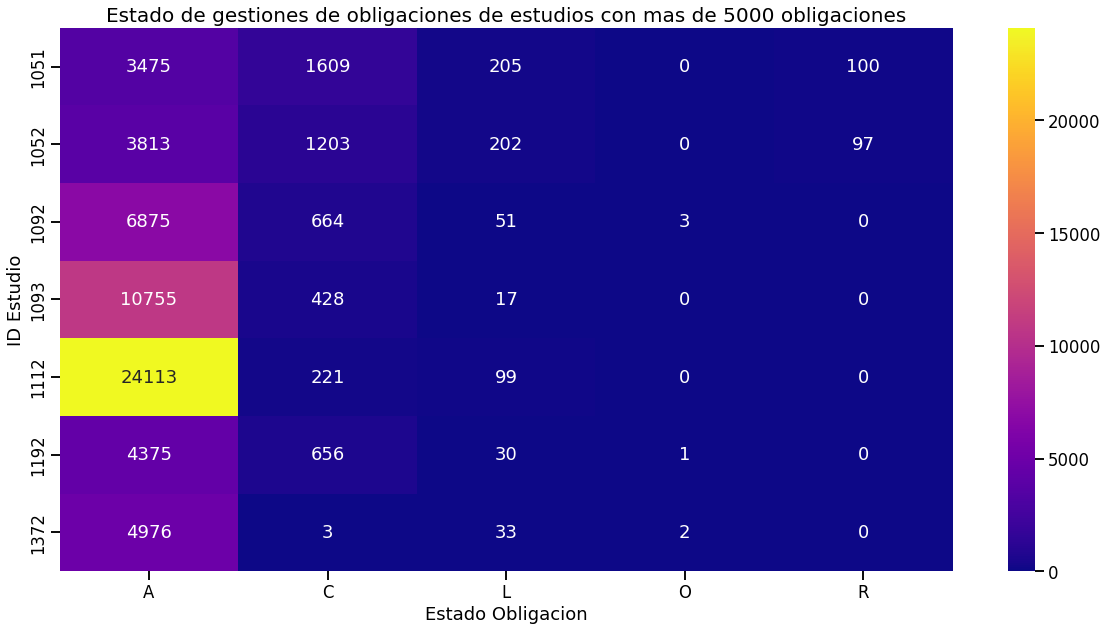

In [42]:
df_obn_woB = df_obn[(df_obn.estado.apply(statusFixer) != 'B') ]
df_obn_woB['obn_count_estudio'] = df_obn_woB['obn_estudio'].map(df_obn_woB['obn_estudio'].value_counts())
df_obn_filtered_woB = df_obn_woB[(df_obn_woB['obn_count_estudio']>5000) ]

estado_obn_estudio_woB = pd.crosstab(df_obn_filtered_woB['obn_estudio'],
                                 df_obn_filtered_woB['estado'].apply(statusFixer))
print(estado_obn_estudio_woB)

plt.figure(num = 1, figsize = (20,10))
sns.heatmap(estado_obn_estudio_woB, annot=True, fmt='d', cmap = 'plasma')
plt.xlabel('Estado Obligacion')
plt.ylabel('ID Estudio')
plt.title('Estado de gestiones de obligaciones de estudios con mas de 5000 obligaciones', fontsize=20)

pd.options.mode.chained_assignment = None

#### Cantidad de obligaciones

In [43]:
obligaciones_totales = set(df_2019_2022.obn_interno.to_list())
print('Obligaciones Totales registradas = ',len(obligaciones_totales))

obligaciones = set(df.obn_interno.to_list())
print('Obligaciones luego del join de los datasets = ',len(obligaciones))

obligaciones_obn = set(df_obn.obn_interno.to_list())
print('Obligaciones finales=', len(obligaciones_obn))

Obligaciones Totales registradas =  235176
Obligaciones luego del join de los datasets =  231275
Obligaciones finales= 231275


Hay un total de 235176 obligaciones registradas, luego del join debido al dropeo de obligaciones sin monto quedan solo 231275 obligaciones.

Hacemos un filtro con los valores representativos de la gestion y las obligaciones y añadimos la columna de cantidad de gestiones por obligacion realizada. Hacemos los descriptivos de la cantidad de gestiones.

In [44]:
df_obn_gestion = df[['seg_codigo','seg_usuario','obn_interno','estado', 'monto_deuda']]
df_obn_gestion['count_gestion'] = df_obn_gestion['obn_interno'].map(df_obn_gestion['obn_interno'].value_counts())
df_obn_gestion = df_obn_gestion.drop_duplicates(subset='obn_interno')
df_obn_gestion['estado'] = df_obn_gestion.estado.apply(statusFixer)
print(f'\nDescriptivo gestiones totales por obligacion\n{df_obn_gestion.count_gestion.describe()}')

pd.options.mode.chained_assignment = None


Descriptivo gestiones totales por obligacion
count    231275.000000
mean         25.571912
std          33.576336
min           1.000000
25%           6.000000
50%          13.000000
75%          28.500000
max         416.000000
Name: count_gestion, dtype: float64


Ploteamos por ges

Text(0, 0.5, 'Estado final de la obligacion')

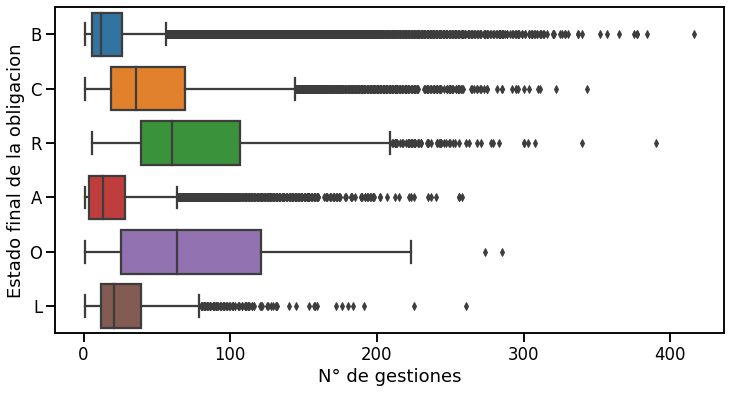

In [45]:
#Boxplot cantidad de gestiones por estado de la obligacion
plt.figure(figsize = (12,6))
sns.boxplot(y="estado", x="count_gestion", data=df_obn_gestion)
plt.xlabel("N° de gestiones")
plt.ylabel("Estado final de la obligacion")

In [46]:
for estado in estados_posibles:
    print(f'Estado {estado}\n{df_obn_gestion[df_obn_gestion.estado == estado].count_gestion.describe()}\n')

Estado B
count    134628.000000
mean         25.255504
std          35.569247
min           1.000000
25%           6.000000
50%          12.000000
75%          26.000000
max         416.000000
Name: count_gestion, dtype: float64

Estado O
count     84.000000
mean      76.595238
std       64.527592
min        1.000000
25%       25.500000
50%       64.000000
75%      121.000000
max      285.000000
Name: count_gestion, dtype: float64

Estado C
count    19875.000000
mean        50.657560
std         43.922518
min          1.000000
25%         19.000000
50%         36.000000
75%         69.000000
max        343.000000
Name: count_gestion, dtype: float64

Estado R
count    1899.000000
mean       78.492891
std        55.206837
min         6.000000
25%        39.000000
50%        60.000000
75%       107.000000
max       390.000000
Name: count_gestion, dtype: float64

Estado L
count    1462.000000
mean       29.964432
std        28.315521
min         1.000000
25%        12.000000
50%        21.

Text(0, 0.5, 'Estado final de la obligacion')

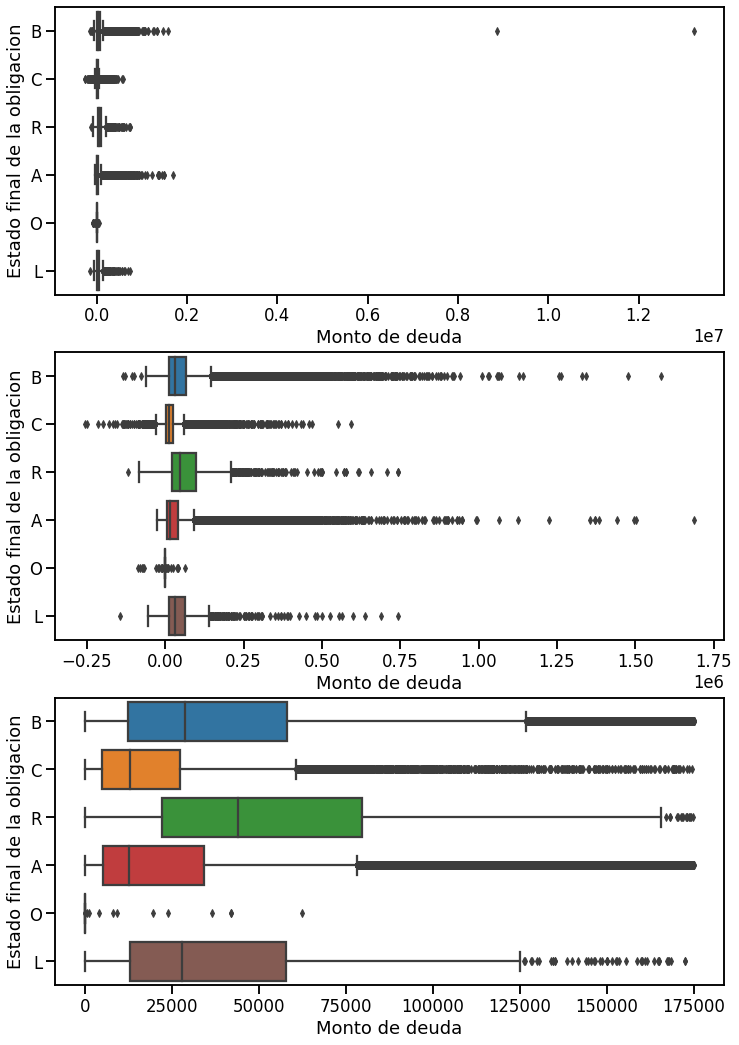

<Figure size 864x432 with 0 Axes>

In [47]:
#Boxplot cantidad de gestiones por estado de la obligacion
fig, axs = plt.subplots(3,figsize=(12, 18))

sns.boxplot(y="estado", x="monto_deuda", data=df_obn_gestion, ax=axs[0])
axs[0].set_xlabel("Monto de deuda")
axs[0].set_ylabel("Estado final de la obligacion")

sns.boxplot(y="estado", x="monto_deuda", data=df_obn_gestion[df_obn_gestion.monto_deuda < 7e6], ax=axs[1])
axs[1].set_xlabel("Monto de deuda")
axs[1].set_ylabel("Estado final de la obligacion")

plt.figure(figsize = (12,6))
sns.boxplot(y="estado", x="monto_deuda", ax=axs[2],\
            data=df_obn_gestion[(df_obn_gestion['monto_deuda'] >= -0.1) & (df_obn_gestion['monto_deuda']< 0.175e6)])
axs[2].set_xlabel("Monto de deuda")
axs[2].set_ylabel("Estado final de la obligacion")

#### Cantidad de acreedores

In [48]:
acreedores_totales = list(set(df_2019_2022.obn_acreedor.to_list()))
print('Acreedores totales=',len(acreedores_totales))

acreedores = df.obn_acreedor.unique()
print('Acreedores despues del join',len(acreedores))

acreedores_obn = list(set(df_obn.obn_acreedor.to_list()))
print('Acreedores que quedan considerando ultima obligacion =',len(acreedores_obn))


Acreedores totales= 11
Acreedores despues del join 11
Acreedores que quedan considerando ultima obligacion = 11


Se observa que la cantidad de acreedores se mantiene constante para los 3 casos. Con esto en mente procedemos a visualizar la cantidad de obligaciones totales por cada acreedor.

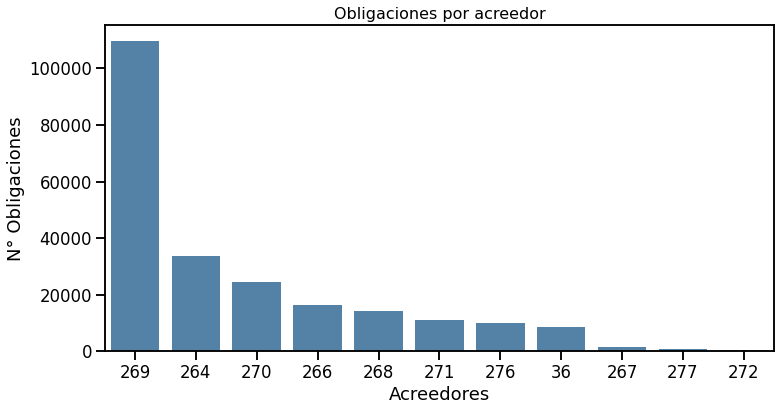

In [49]:
plt.figure(num = 1, figsize = (12,6))
sns.countplot(data=df_obn, x='obn_acreedor',order = df_obn['obn_acreedor'].value_counts().index, color='steelblue')
plt.xticks(rotation = 0)
plt.xlabel("Acreedores")
plt.ylabel("N° Obligaciones")
plt.title("Obligaciones por acreedor",fontsize = 16)
plt.ticklabel_format(axis="y", style="plain")

Discriminamos y observamos la cantidad de obligaciones por acreedor segun el tipo de estado que se encuentra la misma.

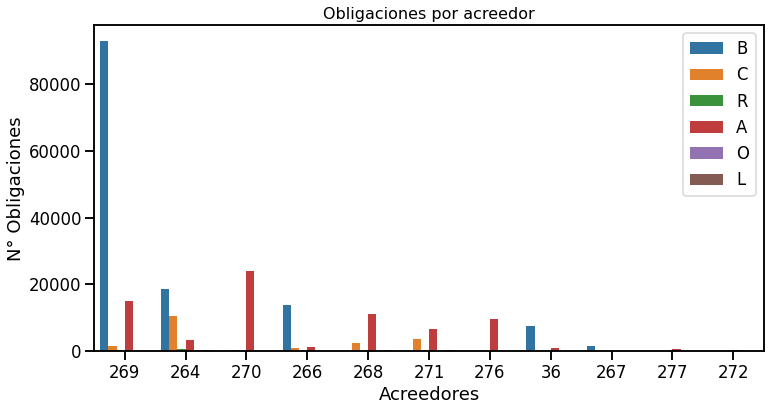

In [50]:
df_obn['estado'] = df_obn['estado'].apply(statusFixer)
df_obn_wo_B = df_obn[df_obn.estado =="O"]
plt.figure(num = 1, figsize = (12,6))
sns.countplot(data=df_obn, x='obn_acreedor',order = df_obn['obn_acreedor'].value_counts().index, hue='estado')
plt.xticks(rotation = 0)
plt.xlabel("Acreedores")
plt.ylabel("N° Obligaciones")
plt.title("Obligaciones por acreedor",fontsize = 16)
plt.ticklabel_format(axis="y", style="plain")
plt.legend(loc='upper right')

pd.options.mode.chained_assignment = None

Hacemos lo mismo pero considerando cada estado por separado.

Text(0, 0.5, 'N° Obligaciones')

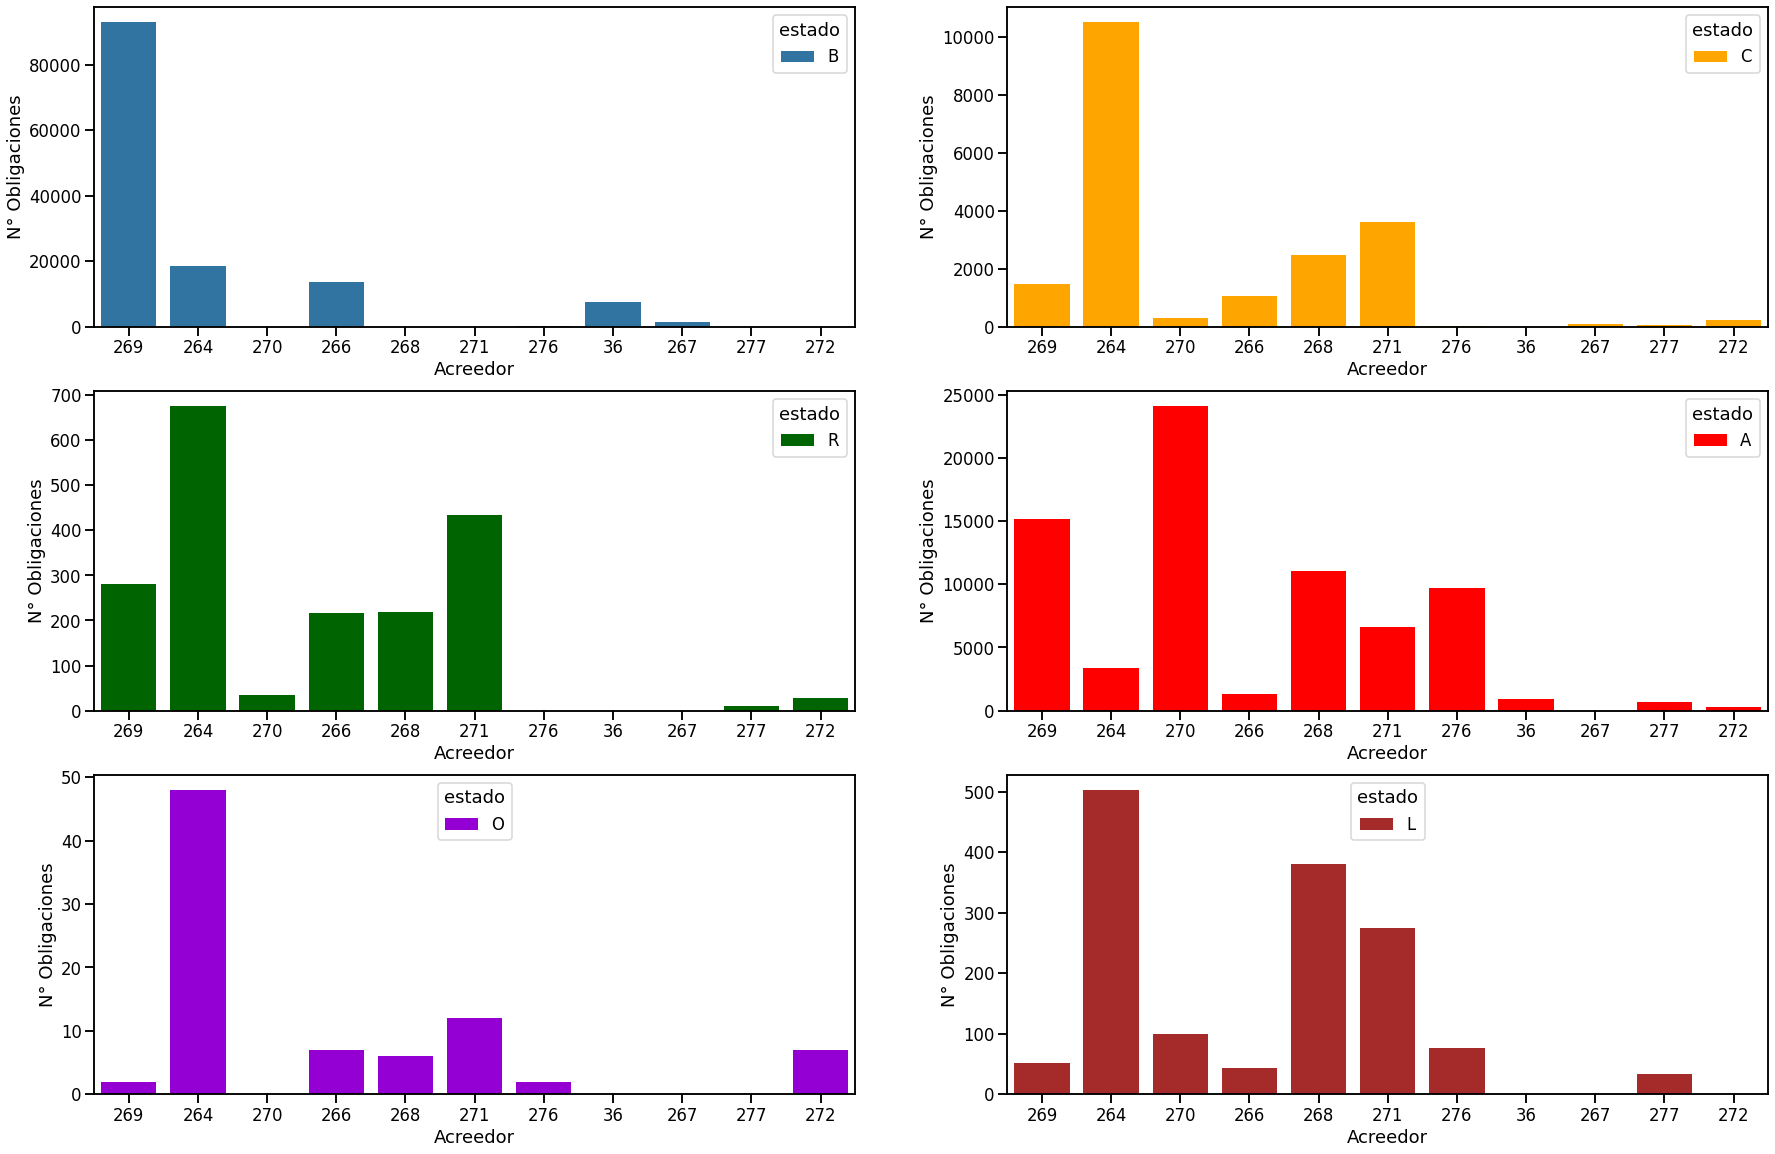

In [51]:
fig, axs = plt.subplots(3,2,figsize=(30, 20))

sns.countplot(data=df_obn[df_obn.estado =="B"], x='obn_acreedor',ax = axs[0,0],\
              order = df_obn['obn_acreedor'].value_counts().index, hue='estado')
axs[0,0].set_xlabel('Acreedor')
axs[0,0].set_ylabel('N° Obligaciones')

sns.countplot(data=df_obn[df_obn.estado =="C"], x='obn_acreedor',ax = axs[0,1],\
              order = df_obn['obn_acreedor'].value_counts().index, hue='estado', facecolor= 'orange')
axs[0,1].set_xlabel('Acreedor')
axs[0,1].set_ylabel('N° Obligaciones')

sns.countplot(data=df_obn[df_obn.estado =="R"], x='obn_acreedor',ax = axs[1,0],\
              order = df_obn['obn_acreedor'].value_counts().index, hue='estado', facecolor= 'darkgreen')
axs[1,0].set_xlabel('Acreedor')
axs[1,0].set_ylabel('N° Obligaciones')

sns.countplot(data=df_obn[df_obn.estado =="A"], x='obn_acreedor',ax = axs[1,1],\
              order = df_obn['obn_acreedor'].value_counts().index, hue='estado', facecolor= 'red')
axs[1,1].set_xlabel('Acreedor')
axs[1,1].set_ylabel('N° Obligaciones')

sns.countplot(data=df_obn[df_obn.estado =="O"], x='obn_acreedor',ax = axs[2,0],\
              order = df_obn['obn_acreedor'].value_counts().index, hue='estado', facecolor= 'darkviolet')
axs[2,0].set_xlabel('Acreedor')
axs[2,0].set_ylabel('N° Obligaciones')

sns.countplot(data=df_obn[df_obn.estado =="L"], x='obn_acreedor',ax = axs[2,1],\
              order = df_obn['obn_acreedor'].value_counts().index, hue='estado', facecolor= 'brown')
axs[2,1].set_xlabel('Acreedor')
axs[2,1].set_ylabel('N° Obligaciones')


#### Cantidad de productos

In [52]:
productos_totales = list(set(df_2019_2022.obn_producto.to_list()))
print('Productos totales=',len(productos_totales))

productos = df.obn_producto.unique()
print('Productos despues del join',len(productos))

productos_obn = list(set(df_obn.obn_producto.to_list()))
print('Productos que quedan considerando ultima obligacion =',len(productos_obn))

Productos totales= 13
Productos despues del join 12
Productos que quedan considerando ultima obligacion = 12


Visualizamos los tipos de productos que  mas aparecen en las obligaciones.

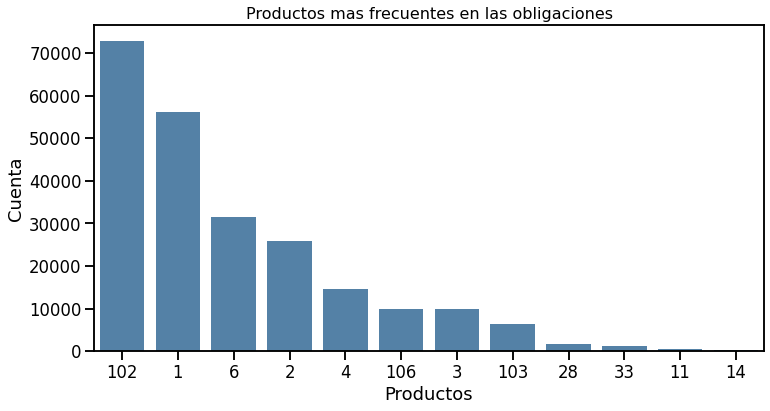

In [53]:
plt.figure(num = 1, figsize = (12,6))
sns.countplot(data=df_obn, x='obn_producto',order = df_obn['obn_producto'].value_counts().index, color='steelblue')
plt.xticks(rotation = 0)
plt.xlabel("Productos")
plt.ylabel("Cuenta")
plt.title("Productos mas frecuentes en las obligaciones",fontsize = 16)
plt.ticklabel_format(axis="y", style="plain")

# 3 Cantidades de carteras asignadas totales y por acreedor.

In [54]:
carteras = list(set(df_obn.obn_cabecera.dropna().to_list()))
print(f"La cantidad de carteras TOTALES es de {(len(carteras))}.")

La cantidad de carteras TOTALES es de 260.


In [55]:
df_cartera_acreedor = df_obn[['obn_acreedor', 'obn_cabecera']]

acc=0
for acreedor in acreedores:
    acc += len(list((set(df_cartera_acreedor[df_cartera_acreedor['obn_acreedor'] == acreedor].obn_cabecera.to_list()))))
    print(f"Acreedor {acreedor}\t-->\
    {len(list((set(df_cartera_acreedor[df_cartera_acreedor['obn_acreedor'] == acreedor].obn_cabecera.to_list()))))} carteras")

print(f'\nEl total de carteras por acreedor es de {acc}\n')

Acreedor 269	-->    40 carteras
Acreedor 264	-->    46 carteras
Acreedor 266	-->    150 carteras
Acreedor 271	-->    3 carteras
Acreedor 272	-->    2 carteras
Acreedor 268	-->    1 carteras
Acreedor 267	-->    1 carteras
Acreedor 270	-->    5 carteras
Acreedor 36	-->    14 carteras
Acreedor 277	-->    3 carteras
Acreedor 276	-->    5 carteras

El total de carteras por acreedor es de 270



Se ve a simple vista que las carteras por acreedor son mas que la cantidad de carteras totales, lo que sugiere que los acreedores comparten algunas de las carteras.

Se observa que de las 260 carteras activas hay 10 que se comparten entre los acreedores. Aplicando una busqueda manual rudimentaria, encontramos las 10 carteras que se comparten y las dropeamos

In [56]:
carteras_264 = set(df_cartera_acreedor[df_cartera_acreedor['obn_acreedor'] == 264].obn_cabecera.to_list())
carteras_266 = set(df_cartera_acreedor[df_cartera_acreedor['obn_acreedor'] == 266].obn_cabecera.to_list())
carteras_269 = set(df_cartera_acreedor[df_cartera_acreedor['obn_acreedor'] == 269].obn_cabecera.to_list())
carteras_267 = set(df_cartera_acreedor[df_cartera_acreedor['obn_acreedor'] == 267].obn_cabecera.to_list())
carteras_271 = set(df_cartera_acreedor[df_cartera_acreedor['obn_acreedor'] == 271].obn_cabecera.to_list())
carteras_272 = set(df_cartera_acreedor[df_cartera_acreedor['obn_acreedor'] == 272].obn_cabecera.to_list())
carteras_36 = set(df_cartera_acreedor[df_cartera_acreedor['obn_acreedor'] == 36].obn_cabecera.to_list())

Vemos que el acreedor 264 y el 266 comparten las carteras 9547 y 9560.

In [57]:
carteras_264.intersection(carteras_266)

{9547, 9560}

Vemos las cartera 9547 de ambos, se observa que para el acreedor 264 hay solo 5 gestiones realizadas en esta cartera mientras que el acreedor 266 tiene 6514.

In [58]:
df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9547)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
2543629,24878450,871158,361,08/06/2020 12:45:10,206,264,1567046,6,9547,21/04/2020,852,C,1567046,-14.00,758342
2543630,24880395,871158,379,08/06/2020 12:45:22,206,264,1567046,6,9547,21/04/2020,852,C,1567046,-14.00,1411916
2569081,26232259,871114,361,31/08/2020 10:28:30,206,264,1566968,6,9547,21/04/2020,992,B,1566968,134650.25,758342
2572980,25710643,811359,361,23/07/2020 08:44:48,206,264,1566911,4,9547,21/04/2020,852,B,1566911,20900.15,758342
2572991,26232153,811359,361,31/08/2020 10:28:30,206,264,1566911,4,9547,21/04/2020,852,B,1566911,20900.15,758342


In [59]:
df[(df['obn_acreedor'] == 266) & (df['obn_cabecera']==9547)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
2543576,24384256,871158,326,14/05/2020 18:35:38,374,266,1567046,6,9547,21/04/2020,852,C,1567046,-14.00,791314
2543577,24229310,871158,21,06/05/2020 12:17:08,368,266,1567046,6,9547,21/04/2020,852,C,1567046,-14.00,28932
2543578,24229311,871158,25,06/05/2020 12:17:08,368,266,1567046,6,9547,21/04/2020,852,C,1567046,-14.00,28752
2543579,24409371,871158,9,15/05/2020 18:40:19,374,266,1567046,6,9547,21/04/2020,852,C,1567046,-14.00,292668
2543580,24216722,871158,178,05/05/2020 15:11:17,374,266,1567046,6,9547,21/04/2020,852,C,1567046,-14.00,37873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987526,26080519,871213,50,19/08/2020 19:47:43,368,266,1567142,6,9547,21/04/2020,971,B,1567142,4991.07,162147
2987527,26080521,871213,50,19/08/2020 19:47:43,368,266,1567142,6,9547,21/04/2020,971,B,1567142,4991.07,162147
2987553,25487587,871127,361,08/07/2020 09:58:56,368,266,1566995,6,9547,21/04/2020,896,B,1566995,171.60,758342
2987554,26079664,871127,50,19/08/2020 19:47:17,368,266,1566995,6,9547,21/04/2020,896,B,1566995,171.60,162147


Se considera la cartera 9547 del acreedor 264 como un error de carga por contener solo 5 gestiones. Se dropea de los dataset.

In [60]:
df = df.drop(df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9547)].index, axis=0)
df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9547)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo


Repetimos el procedimiento para la cartera 9560.

In [61]:
df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9560)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
2552866,24878320,871524,361,08/06/2020 12:45:10,206,264,1568119,6,9560,29/04/2020,852,C,1568119,0.0,758342
2552868,24880265,871524,379,08/06/2020 12:45:22,206,264,1568119,6,9560,29/04/2020,852,C,1568119,0.0,1411916
2624145,24878598,871499,361,08/06/2020 12:45:10,206,264,1568058,6,9560,29/04/2020,852,C,1568058,0.0,758342
2624147,24880543,871499,379,08/06/2020 12:45:22,206,264,1568058,6,9560,29/04/2020,852,C,1568058,0.0,1411916
2624157,25710852,871499,361,23/07/2020 08:44:48,206,264,1568058,6,9560,29/04/2020,852,C,1568058,0.0,758342


In [62]:
df[(df['obn_acreedor'] == 266) & (df['obn_cabecera']==9560)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
2551043,24407877,871492,53,15/05/2020 16:31:54,368,266,1568045,6,9560,29/04/2020,896,C,1568045,0.00,19905
2551044,24288240,871492,330,11/05/2020 09:22:26,377,266,1568045,6,9560,29/04/2020,896,C,1568045,0.00,24553
2551045,24249905,871492,323,07/05/2020 11:16:22,377,266,1568045,6,9560,29/04/2020,896,C,1568045,0.00,805947
2551046,24352649,871492,7,13/05/2020 15:14:06,377,266,1568045,6,9560,29/04/2020,896,C,1568045,0.00,108774
2551047,24288192,871492,9,11/05/2020 09:20:00,377,266,1568045,6,9560,29/04/2020,896,C,1568045,0.00,292668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986255,25457886,871504,33,07/07/2020 18:02:54,294,266,1568067,4,9560,29/04/2020,971,B,1568067,26832.82,30898
2986256,26262529,871504,50,01/09/2020 16:46:03,368,266,1568067,4,9560,29/04/2020,971,B,1568067,26832.82,162147
2987542,25487566,821142,361,08/07/2020 09:58:56,368,266,1568084,4,9560,29/04/2020,971,C,1568084,54.55,758342
2987543,25788286,821142,9,29/07/2020 12:06:20,335,266,1568084,4,9560,29/04/2020,971,C,1568084,54.55,292668


Dropeamos nuevamente las gestiones del acreedor 264

In [63]:
df = df.drop(df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9560)].index, axis=0)
df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9560)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo


En total se dropearon 10 filas.

Realizamos el mismo procedimiento con las carteras compartidas de los acreedores 264 y 269.

In [64]:
carteras_264.intersection(carteras_269)

{9395, 9487}

In [65]:
df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9395)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
1487669,21511388,834547,330,26/12/2019 10:49:09,352,264,1511063,1,9395,26/12/2019,1042,C,1511063,9827.55,24553
1487670,21535536,834547,223,27/12/2019 12:16:44,352,264,1511063,1,9395,26/12/2019,1042,C,1511063,9827.55,66311
1487671,21552514,834547,361,28/12/2019 09:54:27,206,264,1511063,1,9395,26/12/2019,1042,C,1511063,9827.55,758342
1487672,21916303,834547,235,16/01/2020 13:44:03,228,264,1511063,1,9395,26/12/2019,1042,C,1511063,9827.55,39685
1487673,21602317,834547,230,02/01/2020 10:58:54,300,264,1511063,1,9395,26/12/2019,1042,C,1511063,9827.55,19449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885228,27285106,834768,323,24/10/2020 09:59:00,358,264,1511290,1,9395,26/12/2019,1041,C,1511290,14880.04,805947
1885229,27433412,834768,155,03/11/2020 11:41:23,248,264,1511290,1,9395,26/12/2019,1041,C,1511290,14880.04,104861
1885230,27328982,834768,155,27/10/2020 16:54:21,248,264,1511290,1,9395,26/12/2019,1041,C,1511290,14880.04,104861
1885231,27627672,834768,53,17/11/2020 15:52:54,368,264,1511290,1,9395,26/12/2019,1041,C,1511290,14880.04,19905


In [66]:
df[(df['obn_acreedor'] == 269) & (df['obn_cabecera']==9395)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
1487773,26106366,834547,361,21/08/2020 08:27:19,206,269,1511063,1,9395,26/12/2019,1042,C,1511063,9827.55,758342
1499869,25053403,834972,361,16/06/2020 12:11:19,206,269,1511497,1,9395,26/12/2019,1040,C,1511497,-111000.02,758342
1499874,25266295,834972,361,29/06/2020 11:55:52,206,269,1511497,1,9395,26/12/2019,1040,C,1511497,-111000.02,758342
1510322,26106374,834681,361,21/08/2020 08:27:19,206,269,1511201,1,9395,26/12/2019,1041,C,1511201,15790.30,758342
1746164,26106439,834771,361,21/08/2020 08:27:19,206,269,1511293,1,9395,26/12/2019,1041,B,1511293,19850.00,758342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802878,25053464,835109,361,16/06/2020 12:11:19,206,269,1511637,1,9395,26/12/2019,1040,C,1511637,10369.99,758342
1802887,25266327,835109,361,29/06/2020 11:55:52,206,269,1511637,1,9395,26/12/2019,1040,C,1511637,10369.99,758342
1885179,24665110,834768,379,01/06/2020 11:34:31,206,269,1511290,1,9395,26/12/2019,1041,C,1511290,14880.04,1411916
1885183,24664678,834768,361,01/06/2020 11:34:18,206,269,1511290,1,9395,26/12/2019,1041,C,1511290,14880.04,758342


En este caso asumimos las 71 gestiones del acreedor 269 como menos significativas y las dropeamos.

In [67]:
df = df.drop(df[(df['obn_acreedor'] == 269) & (df['obn_cabecera']==9395)].index, axis=0)
df[(df['obn_acreedor'] == 269) & (df['obn_cabecera']==9395)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo


Repetimos el procedimiento con la otra cartera.

In [68]:
df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9487)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
2292938,23247898,854536,326,16/03/2020 15:33:34,354,264,1540641,1,9487,21/02/2020,940,B,1540641,7475.32,791314
2292939,22920662,854536,326,02/03/2020 18:40:03,414,264,1540641,1,9487,21/02/2020,940,B,1540641,7475.32,791314
2292940,23310323,854536,326,19/03/2020 15:25:26,354,264,1540641,1,9487,21/02/2020,940,B,1540641,7475.32,791314
2292941,23310329,854536,326,19/03/2020 15:26:02,354,264,1540641,1,9487,21/02/2020,940,B,1540641,7475.32,791314
2292942,23247890,854536,326,16/03/2020 15:33:06,354,264,1540641,1,9487,21/02/2020,940,B,1540641,7475.32,791314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411890,24017306,854987,27,22/04/2020 15:45:35,368,264,1541107,1,9487,21/02/2020,910,C,1541107,6000.00,32665
2411891,24017341,854987,51,22/04/2020 15:45:37,368,264,1541107,1,9487,21/02/2020,910,C,1541107,6000.00,26111
2411892,24015939,854987,116,22/04/2020 14:03:41,432,264,1541107,1,9487,21/02/2020,910,C,1541107,6000.00,73770
2411893,24037995,854987,340,23/04/2020 13:41:20,368,264,1541107,1,9487,21/02/2020,910,C,1541107,6000.00,11367


In [69]:
df[(df['obn_acreedor'] == 269) & (df['obn_cabecera']==9487)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
2294316,25053488,854688,361,16/06/2020 12:11:19,206,269,1540796,1,9487,21/02/2020,1041,B,1540796,16900.00,758342
2296974,25053468,854623,361,16/06/2020 12:11:19,206,269,1540729,1,9487,21/02/2020,1040,B,1540729,16174.11,758342
2296980,25266328,854623,361,29/06/2020 11:55:52,206,269,1540729,1,9487,21/02/2020,1040,B,1540729,16174.11,758342
2296994,26106410,854623,361,21/08/2020 08:27:19,206,269,1540729,1,9487,21/02/2020,1040,B,1540729,16174.11,758342
2297933,25053489,854960,361,16/06/2020 12:11:19,206,269,1541080,1,9487,21/02/2020,1040,B,1541080,70900.50,758342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407349,25053505,855004,361,16/06/2020 12:11:19,206,269,1541124,1,9487,21/02/2020,1041,C,1541124,-11962.57,758342
2407357,25266346,855004,361,29/06/2020 11:55:52,206,269,1541124,1,9487,21/02/2020,1041,C,1541124,-11962.57,758342
2407363,25356808,855004,361,03/07/2020 10:55:53,207,269,1541124,1,9487,21/02/2020,1041,C,1541124,-11962.57,758342
2407380,26106476,855004,361,21/08/2020 08:27:19,206,269,1541124,1,9487,21/02/2020,1041,C,1541124,-11962.57,758342


Nuevamente dropeamos las gestiones del acreedor 269

In [70]:
df = df.drop(df[(df['obn_acreedor'] == 269) & (df['obn_cabecera']==9487)].index, axis=0)
df[(df['obn_acreedor'] == 269) & (df['obn_cabecera']==9487)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo


Se deropearon 186 gestiones del acreedor 269 en este caso.

Seguimos con las carteras compartidas del acreedor 264 y del 267.

In [71]:
carteras_264.intersection(carteras_267)

{9167}

In [72]:
df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9167)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
266751,24877619,757252,361,08/06/2020 12:45:10,206,264,1389101,1,9167,18/06/2019,936,C,1389101,-3453.0,758342
266752,24879565,757252,379,08/06/2020 12:45:22,206,264,1389101,1,9167,18/06/2019,936,C,1389101,-3453.0,1411916


In [73]:
df[(df['obn_acreedor'] == 267) & (df['obn_cabecera']==9167)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
49669,19437302,756799,9,01/10/2019 17:47:00,340,267,1388636,1,9167,18/06/2019,936,C,1388636,53850.69,292668
49670,19380503,756799,52,30/09/2019 23:47:00,205,267,1388636,1,9167,18/06/2019,936,C,1388636,53850.69,14103
49671,19434714,756799,225,01/10/2019 14:38:00,219,267,1388636,1,9167,18/06/2019,936,C,1388636,53850.69,281259
49672,19571263,756799,235,07/10/2019 13:36:00,228,267,1388636,1,9167,18/06/2019,936,C,1388636,53850.69,39685
49673,19434643,756799,301,01/10/2019 14:36:00,219,267,1388636,1,9167,18/06/2019,936,C,1388636,53850.69,22558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272401,17528976,758254,323,23/07/2019 13:12:00,349,267,1390139,1,9167,18/06/2019,931,B,1390139,23797.94,805947
1272402,17528988,758254,33,23/07/2019 13:13:00,349,267,1390139,1,9167,18/06/2019,931,B,1390139,23797.94,30898
1272403,17528974,758254,323,23/07/2019 13:12:00,349,267,1390139,1,9167,18/06/2019,931,B,1390139,23797.94,805947
1272404,17958199,758254,361,08/08/2019 12:03:00,206,267,1390139,1,9167,18/06/2019,931,B,1390139,23797.94,758342


In [74]:
df = df.drop(df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9167)].index, axis=0)
df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9167)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo


Se dropearon dos gestiones del acreedor 264 de la  cartera 9167.

Continuamos con la siguiente

In [75]:
carteras_264.intersection(carteras_271)

{10123}

In [76]:
df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==10123)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
5397896,38481040,984350,323,27/10/2021 13:01:36,493,264,1728869,1,10123,25/10/2021,940,B,1728869,42608.03,805947
5397897,38521799,984350,326,29/10/2021 17:31:49,493,264,1728869,1,10123,25/10/2021,940,B,1728869,42608.03,791314
5397898,38521973,984350,326,29/10/2021 17:32:11,493,264,1728869,1,10123,25/10/2021,940,B,1728869,42608.03,791314
5397899,38522126,984350,326,29/10/2021 17:34:19,493,264,1728869,1,10123,25/10/2021,940,B,1728869,42608.03,791314
5397900,38522190,984350,326,29/10/2021 17:38:07,493,264,1728869,1,10123,25/10/2021,940,B,1728869,42608.03,791314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575431,41970234,984604,323,16/02/2022 12:31:52,520,264,1729129,1,10123,25/10/2021,940,B,1729129,22000.02,805947
5575432,41970263,984604,320,16/02/2022 12:33:35,520,264,1729129,1,10123,25/10/2021,940,B,1729129,22000.02,27468
5575433,42021594,984604,361,18/02/2022 09:30:20,228,264,1729129,1,10123,25/10/2021,940,B,1729129,22000.02,758342
5575434,42195611,984604,225,02/03/2022 09:03:27,368,264,1729129,1,10123,25/10/2021,940,B,1729129,22000.02,281259


In [77]:
df[(df['obn_acreedor'] == 271) & (df['obn_cabecera']==10123)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
5419831,40039134,984274,361,13/12/2021 13:47:00,248,271,1728792,1,10123,25/10/2021,1040,R,1728792,60.87,758342
5419834,40039992,984274,361,13/12/2021 13:47:31,248,271,1728792,1,10123,25/10/2021,1040,R,1728792,60.87,758342
5422449,40039147,984660,361,13/12/2021 13:47:00,248,271,1729187,1,10123,25/10/2021,1040,R,1729187,6313.92,758342
5422450,40040005,984660,361,13/12/2021 13:47:31,248,271,1729187,1,10123,25/10/2021,1040,R,1729187,6313.92,758342
5422722,40038951,984788,361,13/12/2021 13:47:00,248,271,1729320,1,10123,25/10/2021,1040,C,1729320,0.00,758342
5422723,40039809,984788,361,13/12/2021 13:47:31,248,271,1729320,1,10123,25/10/2021,1040,C,1729320,0.00,758342
5425417,40039123,984776,361,13/12/2021 13:47:00,248,271,1729306,1,10123,25/10/2021,1040,C,1729306,-51930.00,758342
5425418,40039981,984776,361,13/12/2021 13:47:31,248,271,1729306,1,10123,25/10/2021,1040,C,1729306,-51930.00,758342
5429158,40039110,984488,361,13/12/2021 13:47:00,248,271,1729012,1,10123,25/10/2021,1034,C,1729012,-250.00,758342
5429160,40039968,984488,361,13/12/2021 13:47:31,248,271,1729012,1,10123,25/10/2021,1034,C,1729012,-250.00,758342


Se dropean las 48 gestiones del acreedor 271.

In [78]:
df = df.drop(df[(df['obn_acreedor'] == 271) & (df['obn_cabecera']==10123)].index, axis=0)
df[(df['obn_acreedor'] == 271) & (df['obn_cabecera']==10123)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo


Continuamos con las carteras compartidas con entre 264 y 272.

In [79]:
carteras_264.intersection(carteras_272)

{9394, 9576}

In [80]:
df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9394)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
1649196,24199452,769939,361,04/05/2020 11:13:04,206,264,1510913,4,9394,24/12/2019,1213,R,1510913,0.00,758342
1649803,24878068,796889,361,08/06/2020 12:45:10,206,264,1510825,2,9394,24/12/2019,1172,C,1510825,6401.00,758342
1649805,24880014,796889,379,08/06/2020 12:45:22,206,264,1510825,2,9394,24/12/2019,1172,C,1510825,6401.00,1411916
1663757,24199366,796884,361,04/05/2020 11:13:04,206,264,1510805,2,9394,24/12/2019,1213,R,1510805,11332.53,758342
1663765,24878263,796884,361,08/06/2020 12:45:10,206,264,1510805,2,9394,24/12/2019,1213,R,1510805,11332.53,758342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884720,24879874,703662,379,08/06/2020 12:45:22,206,264,1510650,6,9394,24/12/2019,1213,C,1510650,19500.00,1411916
1884860,24877930,712775,361,08/06/2020 12:45:10,206,264,1510556,6,9394,24/12/2019,1152,C,1510556,-36000.00,758342
1884861,24879876,712775,379,08/06/2020 12:45:22,206,264,1510556,6,9394,24/12/2019,1152,C,1510556,-36000.00,1411916
1884864,25710750,712775,361,23/07/2020 08:44:48,206,264,1510556,6,9394,24/12/2019,1152,C,1510556,-36000.00,758342


In [81]:
df[(df['obn_acreedor'] == 272) & (df['obn_cabecera']==9394)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
1488661,21504194,633055,13,24/12/2019 13:10:31,446,272,1510487,2,9394,24/12/2019,1172,C,1510487,-3103.00,30563
1488662,21510914,633055,13,26/12/2019 10:12:02,420,272,1510487,2,9394,24/12/2019,1172,C,1510487,-3103.00,30563
1488663,21586267,633055,300,28/12/2019 13:34:06,207,272,1510487,2,9394,24/12/2019,1172,C,1510487,-3103.00,13069
1488664,21975941,633055,225,17/01/2020 17:25:21,219,272,1510487,2,9394,24/12/2019,1172,C,1510487,-3103.00,281259
1488665,22042548,633055,225,23/01/2020 14:21:50,219,272,1510487,2,9394,24/12/2019,1172,C,1510487,-3103.00,281259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931468,40944169,769600,379,20/01/2022 15:53:15,248,272,1510404,2,9394,24/12/2019,1212,A,1510404,95396.78,1411916
1931469,41291373,769600,8,29/01/2022 13:20:09,550,272,1510404,2,9394,24/12/2019,1212,A,1510404,95396.78,83107
1931470,41290993,769600,323,29/01/2022 12:54:06,550,272,1510404,2,9394,24/12/2019,1212,A,1510404,95396.78,805947
1931471,41290869,769600,323,29/01/2022 12:46:13,550,272,1510404,2,9394,24/12/2019,1212,A,1510404,95396.78,805947


In [82]:
df = df.drop(df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9394)].index, axis=0)
df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9394)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo


Se dropean 271 gestiones del acreedor 264. Se continua con la siguiente cartera.

In [83]:
df[(df['obn_acreedor'] == 264) & (df['obn_cabecera']==9576)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
2553866,24549183,875836,155,23/05/2020 01:36:03,300,264,1574710,1,9576,22/05/2020,909,C,1574710,30193.96,104861
2553867,24550808,875836,155,23/05/2020 14:21:15,300,264,1574710,1,9576,22/05/2020,909,C,1574710,30193.96,104861
2553868,24549180,875836,29,23/05/2020 01:22:18,300,264,1574710,1,9576,22/05/2020,909,C,1574710,30193.96,42819
2553869,24549181,875836,8,23/05/2020 01:22:38,300,264,1574710,1,9576,22/05/2020,909,C,1574710,30193.96,83107
2553870,24549182,875836,8,23/05/2020 01:27:45,300,264,1574710,1,9576,22/05/2020,909,C,1574710,30193.96,83107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946303,25384834,874655,178,06/07/2020 10:19:09,405,264,1573489,1,9576,22/05/2020,906,C,1573489,21000.00,37873
2946304,25384835,874655,237,06/07/2020 10:19:09,405,264,1573489,1,9576,22/05/2020,906,C,1573489,21000.00,29418
2946305,25384836,874655,58,06/07/2020 10:19:09,405,264,1573489,1,9576,22/05/2020,906,C,1573489,21000.00,29881
2946306,25384801,874655,230,06/07/2020 10:16:00,405,264,1573489,1,9576,22/05/2020,906,C,1573489,21000.00,19449


In [84]:
df[(df['obn_acreedor'] == 272) & (df['obn_cabecera']==9576)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
2553954,26056077,875855,361,18/08/2020 13:26:45,206,272,1574729,1,9576,22/05/2020,1042,C,1574729,-10014.05,758342
2554306,26057070,876035,361,18/08/2020 13:26:45,206,272,1574916,1,9576,22/05/2020,1042,B,1574916,68951.79,758342
2554615,26056102,876361,361,18/08/2020 13:26:45,206,272,1575263,1,9576,22/05/2020,1042,C,1575263,72446.59,758342
2555437,26056157,875698,361,18/08/2020 13:26:45,206,272,1574569,1,9576,22/05/2020,1036,C,1574569,6000.02,758342
2558232,26057042,875468,361,18/08/2020 13:26:45,206,272,1574332,1,9576,22/05/2020,1042,B,1574332,12749.58,758342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793843,26056068,876821,361,18/08/2020 13:26:45,206,272,1575742,1,9576,22/05/2020,1035,C,1575742,0.00,758342
2796044,26056015,874970,361,18/08/2020 13:26:45,206,272,1573818,1,9576,22/05/2020,1040,B,1573818,26959.96,758342
2810828,26056165,875862,361,18/08/2020 13:26:45,206,272,1574736,1,9576,22/05/2020,1040,B,1574736,11023.50,758342
2813019,26056872,875175,361,18/08/2020 13:26:45,206,272,1574031,1,9576,22/05/2020,1041,C,1574031,0.00,758342


Se dropean 98 gestiones del acreedor 272.

In [85]:
df = df.drop(df[(df['obn_acreedor'] == 272) & (df['obn_cabecera']==9576)].index, axis=0)
df[(df['obn_acreedor'] == 272) & (df['obn_cabecera']==9576)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo


In [86]:
carteras_36.intersection(carteras_271)

{9533}

In [87]:
df[(df['obn_acreedor'] == 36) & (df['obn_cabecera']== 9533)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
2431942,23790897,867614,323,13/04/2020 13:31:38,459,36,1561774,4,9533,09/04/2020,1264,B,1561774,2580.00,805947
2431943,23854021,867614,50,15/04/2020 12:50:31,228,36,1561774,4,9533,09/04/2020,1264,B,1561774,2580.00,162147
2431944,23790901,867614,323,13/04/2020 13:31:50,459,36,1561774,4,9533,09/04/2020,1264,B,1561774,2580.00,805947
2432294,23791388,864892,323,13/04/2020 13:59:28,399,36,1558584,2,9533,09/04/2020,1264,A,1558584,1867.77,805947
2432295,24177597,864892,326,30/04/2020 17:49:05,446,36,1558584,2,9533,09/04/2020,1264,A,1558584,1867.77,791314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634436,24115708,865904,330,28/04/2020 12:05:05,362,36,1559773,3,9533,09/04/2020,1264,A,1559773,56.48,24553
2635230,24111654,867187,323,28/04/2020 10:19:23,420,36,1561280,3,9533,09/04/2020,1264,A,1561280,55.38,805947
2635231,24111659,867187,323,28/04/2020 10:19:36,420,36,1561280,3,9533,09/04/2020,1264,A,1561280,55.38,805947
2635271,24053205,866741,323,24/04/2020 11:36:27,399,36,1560752,3,9533,09/04/2020,1264,A,1560752,56.10,805947


In [88]:
df[(df['obn_acreedor'] == 271) & (df['obn_cabecera']==9533)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
2793917,25105358,831399,365,19/06/2020 07:15:54,205,271,1559964,2,9533,09/04/2020,1264,A,1559964,5481.16,14522


Se dropea la gestion del acreedor 271.

In [89]:
df = df.drop(df[(df['obn_acreedor'] == 271) & (df['obn_cabecera']==9533)].index, axis=0)
df[(df['obn_acreedor'] == 271) & (df['obn_cabecera']==9533)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo


Seguimos con la cartera compartida entre el acreedor 269 y el 266.

In [90]:
carteras_269.intersection(carteras_266)

{9581}

In [91]:
df[(df['obn_acreedor'] == 266) & (df['obn_cabecera']==9581)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
2655384,24926490,877972,326,09/06/2020 14:20:48,374,266,1577249,6,9581,03/06/2020,896,B,1577249,27841.74,791314
2655385,24986220,877972,323,11/06/2020 17:16:56,370,266,1577249,6,9581,03/06/2020,896,B,1577249,27841.74,805947
2655386,25180804,877972,323,23/06/2020 21:03:35,370,266,1577249,6,9581,03/06/2020,896,B,1577249,27841.74,805947
2655387,25058965,877972,326,16/06/2020 18:53:57,374,266,1577249,6,9581,03/06/2020,896,B,1577249,27841.74,791314
2655388,25128921,877972,323,19/06/2020 19:36:56,370,266,1577249,6,9581,03/06/2020,896,B,1577249,27841.74,805947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985307,26647633,877993,50,29/09/2020 17:15:36,368,266,1577298,4,9581,03/06/2020,971,B,1577298,12.67,162147
2987107,25487504,877947,361,08/07/2020 09:58:56,368,266,1577203,6,9581,03/06/2020,896,B,1577203,35.24,758342
2987108,26042197,877947,361,14/08/2020 19:47:55,206,266,1577203,6,9581,03/06/2020,896,B,1577203,35.24,758342
2987109,26040775,877947,361,14/08/2020 19:45:24,206,266,1577203,6,9581,03/06/2020,896,B,1577203,35.24,758342


In [92]:
df[(df['obn_acreedor'] == 269) & (df['obn_cabecera']==9581)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
2779211,28014600,852085,365,11/12/2020 07:15:26,205,269,1577284,6,9581,03/06/2020,992,B,1577284,52833.4,14522
2779215,28497048,852085,365,08/01/2021 07:32:57,205,269,1577284,6,9581,03/06/2020,992,B,1577284,52833.4,14522
2779219,32098990,852085,365,26/04/2021 08:25:59,205,269,1577284,6,9581,03/06/2020,992,B,1577284,52833.4,14522


Se dropean las 3 gestiones del acreedor 269.

In [93]:
df = df.drop(df[(df['obn_acreedor'] == 269) & (df['obn_cabecera']==9581)].index, axis=0)
df[(df['obn_acreedor'] == 269) & (df['obn_cabecera']==9581)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo


Concluimos con la cartera compartida entre el acreedor 269 y 267.

In [94]:
carteras_269.intersection(carteras_267)

set()

In [95]:
df[(df['obn_acreedor'] == 269) & (df['obn_cabecera']==9167)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
266750,25053484,757252,361,16/06/2020 12:11:19,206,269,1389101,1,9167,18/06/2019,936,C,1389101,-3453.0,758342


In [96]:
df[(df['obn_acreedor'] == 267) & (df['obn_cabecera']==9167)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo
49669,19437302,756799,9,01/10/2019 17:47:00,340,267,1388636,1,9167,18/06/2019,936,C,1388636,53850.69,292668
49670,19380503,756799,52,30/09/2019 23:47:00,205,267,1388636,1,9167,18/06/2019,936,C,1388636,53850.69,14103
49671,19434714,756799,225,01/10/2019 14:38:00,219,267,1388636,1,9167,18/06/2019,936,C,1388636,53850.69,281259
49672,19571263,756799,235,07/10/2019 13:36:00,228,267,1388636,1,9167,18/06/2019,936,C,1388636,53850.69,39685
49673,19434643,756799,301,01/10/2019 14:36:00,219,267,1388636,1,9167,18/06/2019,936,C,1388636,53850.69,22558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272401,17528976,758254,323,23/07/2019 13:12:00,349,267,1390139,1,9167,18/06/2019,931,B,1390139,23797.94,805947
1272402,17528988,758254,33,23/07/2019 13:13:00,349,267,1390139,1,9167,18/06/2019,931,B,1390139,23797.94,30898
1272403,17528974,758254,323,23/07/2019 13:12:00,349,267,1390139,1,9167,18/06/2019,931,B,1390139,23797.94,805947
1272404,17958199,758254,361,08/08/2019 12:03:00,206,267,1390139,1,9167,18/06/2019,931,B,1390139,23797.94,758342


Dropeamos la unica gestion del acreedor 269.

In [97]:
df = df.drop(df[(df['obn_acreedor'] == 269) & (df['obn_cabecera']==9167)].index, axis=0)
df[(df['obn_acreedor'] == 269) & (df['obn_cabecera']==9167)]

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda,seg_count_codigo


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913524 entries, 0 to 5914143
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   seg_id            int64  
 1   prs_id            int64  
 2   seg_codigo        int64  
 3   hora              object 
 4   seg_usuario       int64  
 5   obn_acreedor      int64  
 6   obn_interno       int64  
 7   obn_producto      int64  
 8   obn_cabecera      int64  
 9   fecha_alta        object 
 10  obn_estudio       int64  
 11  estado            object 
 12  obn_id            int64  
 13  monto_deuda       float64
 14  seg_count_codigo  int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 721.9+ MB


In [99]:
df_obn = df.drop_duplicates(subset=['obn_interno'], keep='last')

In [100]:
df_cartera_acreedor = df_obn[['obn_acreedor', 'obn_cabecera']]

acc=0
for acreedor in acreedores:
    acc += len(list((set(df_cartera_acreedor[df_cartera_acreedor['obn_acreedor'] == acreedor].obn_cabecera.to_list()))))
    print(f"Acreedor {acreedor}\t-->\
    {len(list((set(df_cartera_acreedor[df_cartera_acreedor['obn_acreedor'] == acreedor].obn_cabecera.to_list()))))} carteras")

print(f'\nEl total de carteras por acreedor es de {acc}\n')

Acreedor 269	-->    37 carteras
Acreedor 264	-->    42 carteras
Acreedor 266	-->    150 carteras
Acreedor 271	-->    1 carteras
Acreedor 272	-->    1 carteras
Acreedor 268	-->    1 carteras
Acreedor 267	-->    1 carteras
Acreedor 270	-->    5 carteras
Acreedor 36	-->    14 carteras
Acreedor 277	-->    3 carteras
Acreedor 276	-->    5 carteras

El total de carteras por acreedor es de 260



# 4 Maximo minimo y promedio de obligaciones por persona

In [101]:
#Elimina el Warning
pd.options.mode.chained_assignment = None 

print(f"Hay {len(obligaciones)} obligaciones y {len(personas)} personas\n")

df_prs_obn = df_obn[['prs_id','obn_interno']]

df_prs_obn['obn_count'] = df_prs_obn['obn_interno'].map(df_prs_obn['obn_interno'].value_counts())


df_prs_obn = df_prs_obn.groupby('prs_id').sum().drop(columns='obn_interno')

print(f"El minimo de obligaciones por persona es de {df_prs_obn.obn_count.min()}\n\
El maximo de obligaciones por persona es de {df_prs_obn.obn_count.max()}\n\
La media de obligaciones por persona es de {round(df_prs_obn.obn_count.mean())}")

df_prs_obn.obn_count.describe()

Hay 231275 obligaciones y 180848 personas

El minimo de obligaciones por persona es de 1
El maximo de obligaciones por persona es de 50
La media de obligaciones por persona es de 1


count    180848.000000
mean          1.278831
std           0.715086
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          50.000000
Name: obn_count, dtype: float64

In [102]:
df_prs_obn.obn_count.value_counts().to_frame()

,obn_count
1,144719
2,27795
3,4751
4,2401
5,677
6,308
7,85
8,43
9,24
12,10


Se observa como la mayor cantidad de personas tienen por tendencia general una sola obligacion.

Almacenamos el df limpio para usarlo en el proximo entregable

In [104]:
df.to_csv("df_m19.csv", index=None)